GPFS/exfel/exp/MID/202405/p006578/usr/Shared/jan/scratch/Untitled.ipynb

In [ ]:
[]

In [17]:
run = 1

In [18]:
%load_ext autoreload
%autoreload 2
import karabo_bridge

In [1]:
import numpy as np
import extra_data as ex
from extra_data.components import AGIPD1M
from extra_geom import AGIPD_1MGeometry
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from extra_geom import AGIPD_1MGeometry

agipd_geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
    (-525, 625),
    (-550, -10),
    (520, -160),
    (542.5, 475),
])

In [2]:
det = {
    "epix1": "MID_EXP_EPIX-1/CORR/RECEIVER:daqOutput",
    "epix2": "MID_EXP_EPIX-2/CORR/RECEIVER:daqOutput",
    "dd1": "MID_EXP_FASTADC/ADC/DESTEST:channel_3.output",
    "dd2": "MID_EXP_FASTADC/ADC/DESTEST:channel_6.output",
    "sample_z": "MID_EXP_SAM/MDL/DATA_SELECTOR",
    "jf": "MID_EXP_JF500K1/CORR/JNGFR01:daqOutput",
    # 'hirex': 'SA2_XTD6_HIREX/CORR/GOTTHARD_RECEIVER:daqOutput',
    # 'xgm': 'SA2_XTD1_XGM/XGM/DOOCS:output',
    # 'gh2': 'MID_EXP_GH2/CORR/RECEIVER:daqOutput'
}

proposal = 6933

def data_source(run):
    ds = ex.open_run(proposal=proposal, run=run)
    ds.info()
    ds.all_sources
    sel = ds.select(['*AGIPD1M-1/DET/*'])#, 'MID_EXP_JF500K1/CORR/JNGFR01:daqOutput'])#, 'image.data')
    #sel = ds.select(['*AGIPD1M-1/CORR/*'], require_all=True)

    for t_id, t_data in sel.trains(require_all=True):
        yield t_id, t_data#['MID_DET_AGIPD1M-1/DET/*CH0:xtdf']['image.data']

In [21]:
data = data_source(run)

In [22]:
t, d = next(data)

# of trains:    61
Duration:       0:00:06.1
First train ID: 2269294077
Last train ID:  2269294137

16 XTDF detector modules of SPB_DET_AGIPD1M-1/CORR/*
  e.g. module 0 : 512 x 128 pixels
  SPB_DET_AGIPD1M-1/CORR/0CH0:output
  351 frames per train, up to 21411 frames total

16 XTDF detector modules of SPB_DET_AGIPD1M-1/DET/*
  e.g. module 0 : 512 x 128 pixels
  SPB_DET_AGIPD1M-1/DET/0CH0:xtdf
  352 frames per train, up to 21472 frames total

12 instrument sources (excluding XTDF detectors):
  - SA1_XTD2_XGM/XGM/DOOCS:output 
  - SA1_XTD9_HIREX/CORR/GOTTHARD_RECEIVER:daqOutput 
  - SA1_XTD9_HIREX/DET/GOTTHARD2_MASTER:daqOutput 
  - SA1_XTD9_HIREX/DET/GOTTHARD2_SLAVE:daqOutput 
  - SPB_DET_AGIPD1M-1/REDU/SPI_HITFINDER:output 
  - SPB_EHD_IBS/CAM/1:daqOutput 
  - SPB_EXP_SYS/TSYS/TIMESERVER:outputBunchPattern 
  - SPB_EXP_ZYLA/CAM/1:daqOutput 
  - SPB_IRU_AEROSOL/CAM/CAM_1:daqOutput 
  - SPB_IRU_AGIPD1M1/REDU/LITFRM:output 
  - SPB_RR_SYS/TSYS/X2TIMER2:outputBunchPattern 
  - SPB_XTD9_XGM

In [23]:
t

2269294077

In [24]:
sorted(d.keys())

['SPB_DET_AGIPD1M-1/DET/0CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/10CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/11CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/12CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/13CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/14CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/15CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/1CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/2CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/3CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/4CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/5CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/6CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/7CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/8CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/9CH0:xtdf']

In [18]:
#d['SPB_DET_AGIPD1M-1/DET/0CH0:xtdf']

In [30]:
i = ex.stack_detector_data(d, 'image.data')#, pattern='/CORR/(\\d+)CH')

In [31]:
i.shape

(352, 2, 16, 512, 128)

In [32]:
np.where(i!=0)

(array([  0,   0,   0, ..., 351, 351, 351]),
 array([0, 0, 0, ..., 1, 1, 1]),
 array([ 0,  0,  0, ..., 15, 15, 15]),
 array([  0,   0,   0, ..., 511, 511, 511]),
 array([  0,   1,   2, ..., 125, 126, 127]))

In [96]:
assembled_data, coords = agipd_geom.position_modules(i[0][0])

In [97]:
assembled_data.shape

(1256, 1092)

Center: [631 550]


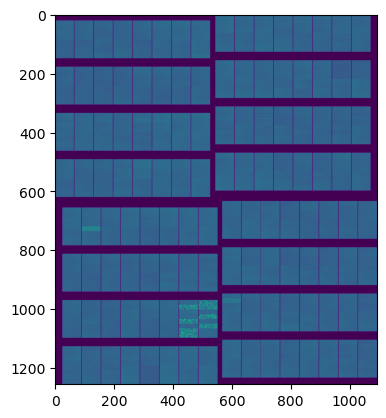

In [98]:
plt.imshow(assembled_data)
print('Center: {}'.format(coords))

matplotlib.axes._axes.Axes

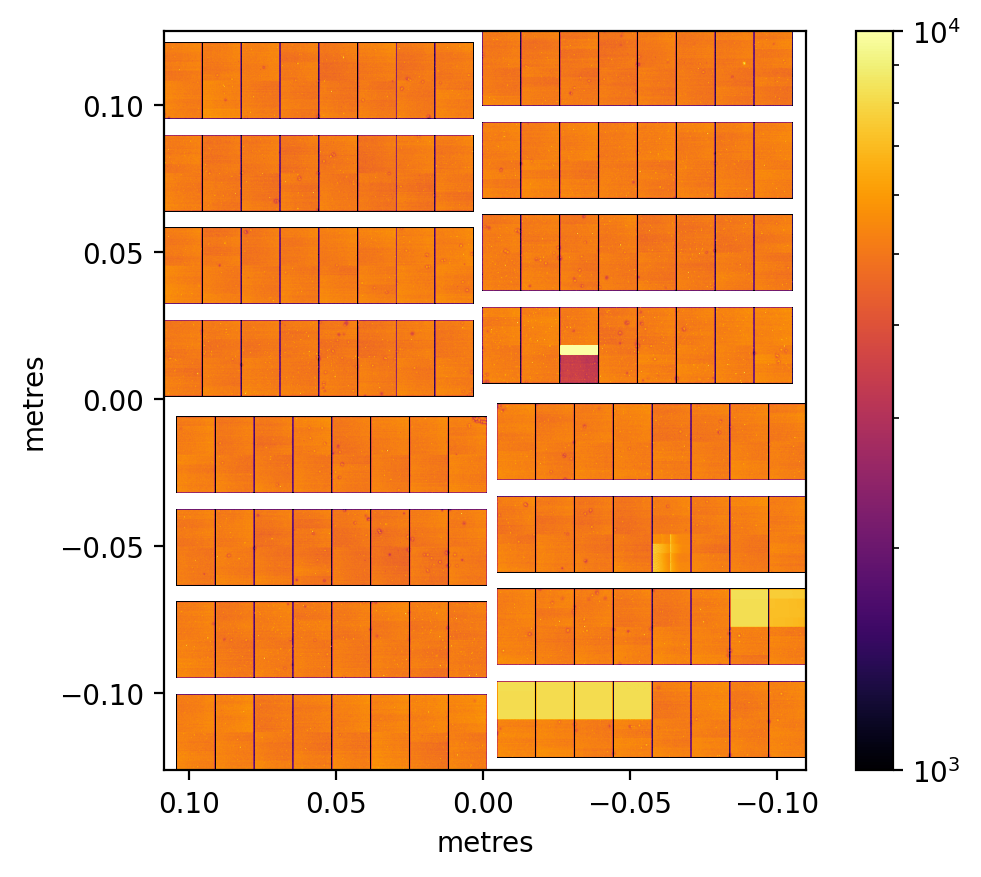

In [55]:
fig, ax = plt.subplots(dpi=200)
cmap = plt.get_cmap('inferno')
cmap.set_under(color='black')  # Color for values below vmin (black)
cmap.set_bad(color='black')

a = agipd_geom.plot_data(i[0][0], ax=ax, axis_units='m', cmap='inferno', norm=LogNorm(vmin=1e3, vmax=1e4))
type(a)

In [ ]:
{}

In [3]:
def servedata(host, sock='REQ'):
    '''
    Generator for the online data stream.
    Input: 
        host: ip address of data stream
        type: ???
    Output:
        dictionary of values for current event
    '''
    from karabo_bridge import Client
    # Generate a client to serve the data
    c = Client(endpoint=host, sock=sock)

    # Return the newest event in the datastream using an iterator construct
    for ret in c:
        yield {'data':ret[0], 'meta':ret[1]} #it comes out as a dict so the we have a consistent datastream

In [38]:
d = servedata('tcp://max-exfl261.desy.de:1234')

In [51]:
%timeit data = next(d)

576 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
#data

In [48]:
agipd_run = ex.open_run(proposal=700000, run=5, data='proc')

tid, train_data = agipd_run.select('*/DET/*', 'image.data').train_from_index(60)
stacked = ex.stack_detector_data(train_data, 'image.data')
stacked_pulse = stacked
stacked_pulse.shape

(176, 16, 512, 128)

In [32]:
'''
Created on Friday 28.02.2025

@author: Jan Niklas Leutloff
'''

import numpy as np
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

def radialProfile(img, center=None):
    '''
    Parameter
    ---------
    img : np.ndarray
        The input image
    center : (int, int) optional
        (y-coordinate, x-coordinate) of the center
        The center of the input image or the center of
        the debye rings which are displayed in the image

    Returns
    -------
    The radial profile of the image
    '''
    if center is None:
        #        y-coordinate        x-coordinate
        center = img.shape[0] // 2,  img.shape[1] // 2
        
    y, x = np.indices((img.shape))
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(int)

    tbin = np.bincount(r.ravel(), img.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr

    return radialprofile

def radialProfile_pyfai(img, geom, dist, wavelength):
    ai = AzimuthalIntegrator(
        detector=geom.to_pyfai_detector(),
        #dist=dist,  # sample-detector distance (m)
        #wavelength=wavelength#(12.3984 / 9.3) * 1e-10  # wavelength (m)
    )
    rint, I = ai.integrate1d(
        img.reshape(16*512, 128),
        npt=300,
        unit="r_mm",
    )
    
    plt.plot(rint, I)
    plt.xlabel('radius (mm)')

    return rint, I

In [2]:
import sys
sys.path.append('gpfs/exfel/exp/SPB/202501/p006933/usr/Software/scratch')
import azim_integration as az

# Generate a simple pattern with a sharper ring and a broader one
px, py, pz = np.moveaxis(agipd_geom.get_pixel_positions(), -1, 0)

r = np.sqrt((px ** 2) + (py ** 2))

a1, b1, c1 = 1, 0.15, 0.08
a2, b2, c2 = 1, 0.06, 0.002
frame = (
    a1 * np.exp(- ((r-b1) ** 2) / (2 * c1 ** 2)) +
    a2 * np.exp(- ((r-b2) ** 2) / (2 * c2 ** 2))
)

In [3]:
np.any(np.isnan(frame))#np.shape(frame)

False

In [4]:
assembled_frame, coords = agipd_geom.position_modules(frame)
print(coords)
assembled_frame[np.isnan(assembled_frame)]=0
np.any(np.isnan(assembled_frame))

[631 550]


False

<Axes: xlabel='pixels', ylabel='pixels'>

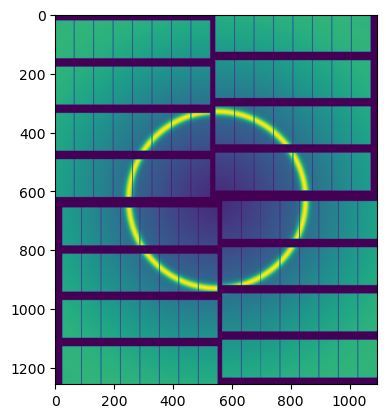

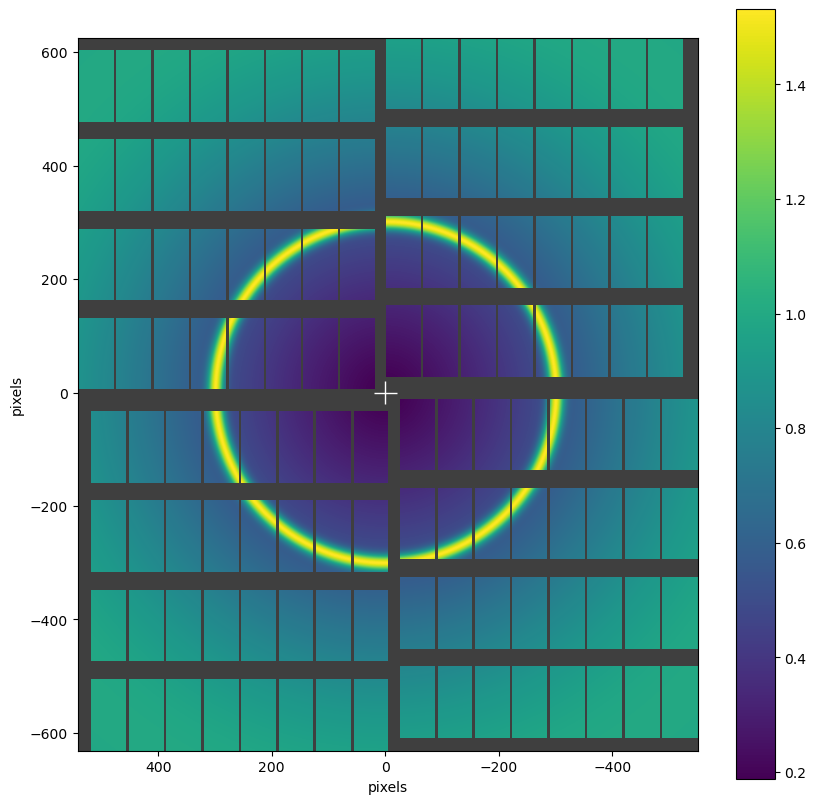

In [5]:
plt.imshow(assembled_frame)
agipd_geom.plot_data(frame)

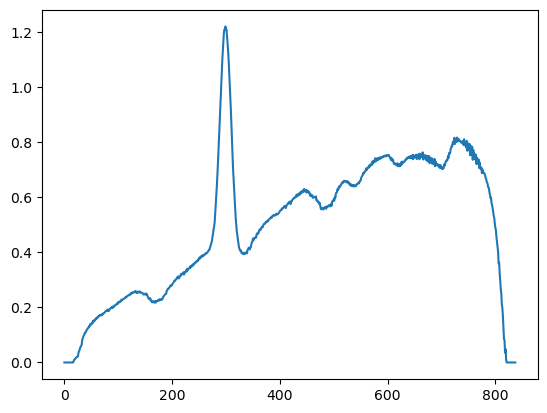

In [6]:
plt.plot(az.radialProfile(assembled_frame, center=[631, 550]))

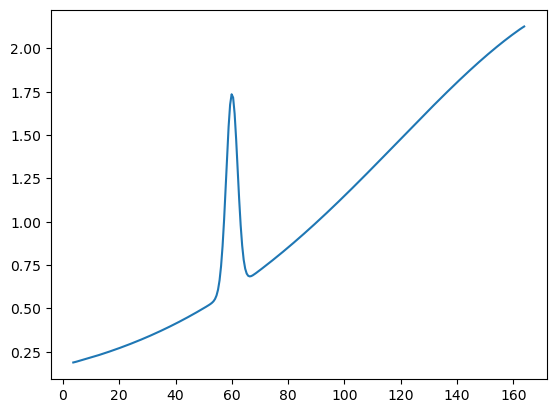

In [9]:
r, I = az.radialProfile_pyfai(frame, agipd_geom, 0.2, 12)
plt.plot(r, I)

In [3]:
from karabo_bridge import Client
krb_client = Client('tcp://max-exfl261.desy.de:1234')
data, metadata = krb_client.next()
data.keys()

dict_keys(['SPB_DET_AGIPD1M-1/CAL/APPEND_CORRECTED'])

In [52]:
%timeit data, metadata = krb_client.next()

575 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
i = data['SPB_DET_AGIPD1M-1/CAL/APPEND_CORRECTED']['image.data']

In [15]:
i.shape

(16, 128, 512, 64)

In [29]:
i = i.transpose(3, 0, 2, 1)

In [30]:
i.shape

(64, 16, 512, 128)

<Axes: xlabel='pixels', ylabel='pixels'>

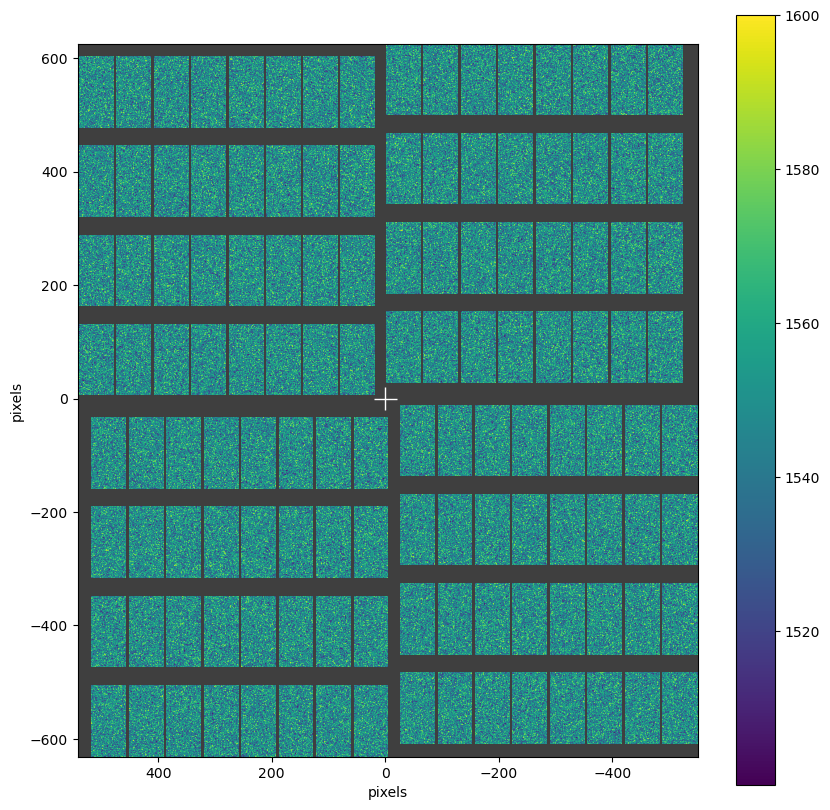

In [31]:
agipd_geom.plot_data(i[0])

In [24]:
import numpy as np

# Create a large array
array = np.random.rand(16, 128, 512, 64)

# Time the transpose operation
import time
start = time.time()
transposed_array = array.transpose(3, 0, 2, 1)
end = time.time()

print(f"Transpose took {end - start} seconds")


Transpose took 4.6253204345703125e-05 seconds


In [25]:
%timeit transposed_array = array.transpose(3, 0, 2, 1)

210 ns ± 0.938 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [9]:
d = {'MID_EXP_JF500K1/CORR/JNGFR01:daqOutput': 40}

In [11]:
d['*/CORR/*']

KeyError: '*/CORR/*'

In [100]:
pixpos = agipd_geom.get_pixel_positions()
px, py, pz = np.moveaxis(pixpos, -1, 0)  # Separate x, y, z coordinates
print(px.shape, py.shape)  # (modules, slow scan, fast scan)

(16, 512, 128) (16, 512, 128)


In [101]:
rect_mask = (0.01 < px) & (px < 0.05) & (-0.05 < py) & (py < -0.02)

In [102]:
rect_mask.shape

(16, 512, 128)

In [43]:
mask = np.zeros((16, 512, 128))

In [44]:
mask[0][0:128, 0:128]=1
mask[7][0:128, 0:128]=1
mask[11][0:128, 0:128]=1
mask[12][0:128, 0:128]=1

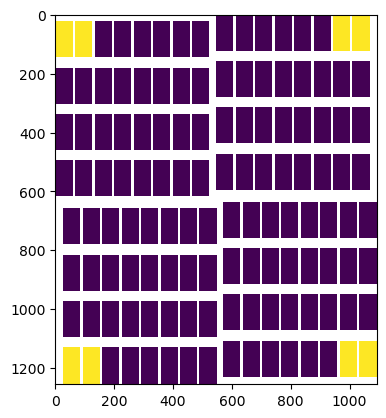

In [45]:
m, c = agipd_geom.position_modules(mask)
plt.imshow(m)

In [1]:
import numpy as np
import peak_finder as pf

In [2]:
i_calibration = np.load('CalibrationCalib_og.npy')

In [3]:
i_calibration.shape

(8, 512, 1024)

In [47]:
df = pf.advancedPeakFinder_img(i_calibration, mask=1)

In [53]:
np.asarray(df['peak_pos_cm'])[0][0]

465

In [49]:
i_test = np.zeros((8, 512, 1024)) + 50

In [10]:
df = pf.advancedPeakFinder_img(i_test, 1)
df.empty

True

In [14]:
# Place one point in each module
module_no = np.arange(0, 16)
# For AGIPD, slow-scan is the x dimension, increasing from the edges towards the centre
slow_scan = np.linspace(10, 500, num=16)
fast_scan = np.full(fill_value=40.1, shape=16)  # Fixed y position in each module

positions = agipd_geom.data_coords_to_positions(module_no, slow_scan, fast_scan)
print("positions.shape =", positions.shape)  # (point, x/y/z)

#ax = agipd_geom.inspect(axis_units='m')

px = positions[:, 0]
py = positions[:, 1]

#ax.scatter(px, py);
print(px)

positions.shape = (16, 3)
[-0.103      -0.09646667 -0.08953333 -0.083      -0.08106667 -0.07453333
 -0.0676     -0.06106667  0.04813333  0.0416      0.03466667  0.02813333
  0.0257      0.01916667  0.01223333  0.0057    ]


In [1]:
import data_helper as dh
import numpy as np
import extra_data as ex

def generate_images(num_images):
    """
    Erzeugt eine Liste von `num_images` 3D-Bildern mit der Form (16, 512, 128).
    Jedes Bild enthält zufällige Werte zwischen 0 und 255 (als Ganzzahlen).
    
    :param num_images: Die Anzahl der zu erzeugenden Bilder
    :return: Eine Liste von 3D-Bildern mit der Form (16, 512, 128)
    """
    images = []
    for _ in range(num_images):
        # Erzeuge ein Bild mit zufälligen Werten im Bereich [0, 255]
        image = np.random.random(size=(16, 512, 128)).astype(np.float32)
        images.append(image)
    
    return images

In [2]:
g = dh.getGeometry(6)

In [18]:
data = dh.train_source(1, verbose=True)

In [19]:
t, d = next(data)

# of trains:    61
Duration:       0:00:06.1
First train ID: 2269294077
Last train ID:  2269294137

16 XTDF detector modules of SPB_DET_AGIPD1M-1/CORR/*
  e.g. module 0 : 512 x 128 pixels
  SPB_DET_AGIPD1M-1/CORR/0CH0:output
  351 frames per train, up to 21411 frames total

16 XTDF detector modules of SPB_DET_AGIPD1M-1/DET/*
  e.g. module 0 : 512 x 128 pixels
  SPB_DET_AGIPD1M-1/DET/0CH0:xtdf
  352 frames per train, up to 21472 frames total

12 instrument sources (excluding XTDF detectors):
  - SA1_XTD2_XGM/XGM/DOOCS:output 
  - SA1_XTD9_HIREX/CORR/GOTTHARD_RECEIVER:daqOutput 
  - SA1_XTD9_HIREX/DET/GOTTHARD2_MASTER:daqOutput 
  - SA1_XTD9_HIREX/DET/GOTTHARD2_SLAVE:daqOutput 
  - SPB_DET_AGIPD1M-1/REDU/SPI_HITFINDER:output 
  - SPB_EHD_IBS/CAM/1:daqOutput 
  - SPB_EXP_SYS/TSYS/TIMESERVER:outputBunchPattern 
  - SPB_EXP_ZYLA/CAM/1:daqOutput 
  - SPB_IRU_AEROSOL/CAM/CAM_1:daqOutput 
  - SPB_IRU_AGIPD1M1/REDU/LITFRM:output 
  - SPB_RR_SYS/TSYS/X2TIMER2:outputBunchPattern 
  - SPB_XTD9_XGM

In [38]:
sorted(d.keys())

['SA1_XTD2_ATT/MDL/MAIN',
 'SA1_XTD2_XGM/XGM/DOOCS:output',
 'SA1_XTD9_HIREX/CORR/GOTTHARD_RECEIVER:daqOutput',
 'SPB_DET_AGIPD1M-1/CORR/0CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/10CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/11CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/12CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/13CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/14CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/15CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/1CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/2CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/3CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/4CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/5CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/6CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/7CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/8CH0:output',
 'SPB_DET_AGIPD1M-1/CORR/9CH0:output',
 'SPB_DET_AGIPD1M-1/REDU/SPI_HITFINDER:output',
 'SPB_IRU_AGIPD1M/MOTOR/Z_STEPPER',
 'SPB_IRU_INJMOV/MOTOR/X',
 'SPB_IRU_INJMOV/MOTOR/Y',
 'SPB_IRU_INJMOV/MOTOR/Z',
 'SPB_XTD2_UND/DOOCS/ENERGY',
 'SPB_XTD9_ATT/MDL/MAIN',
 'SPB_XTD9_XGM/XGM/DOOCS:output']

In [6]:
flags = d[dh.det['hitfinder']]['data.hitFlag']
pulseId = np.arange(4, 101, 4)
images = generate_images(25)
i=0
for flag, p_id, image in zip(flags, pulseId, images):
    if flag==0: continue
    print(i)
    i+=1

In [39]:
det_agipd = {}
for i in range(16):
    det_agipd['{}'.format(i)] = 'SPB_DET_AGIPD1M-1/CORR/{}CH0:output'.format(i)

In [40]:
det_agipd

{'0': 'SPB_DET_AGIPD1M-1/CORR/0CH0:output',
 '1': 'SPB_DET_AGIPD1M-1/CORR/1CH0:output',
 '2': 'SPB_DET_AGIPD1M-1/CORR/2CH0:output',
 '3': 'SPB_DET_AGIPD1M-1/CORR/3CH0:output',
 '4': 'SPB_DET_AGIPD1M-1/CORR/4CH0:output',
 '5': 'SPB_DET_AGIPD1M-1/CORR/5CH0:output',
 '6': 'SPB_DET_AGIPD1M-1/CORR/6CH0:output',
 '7': 'SPB_DET_AGIPD1M-1/CORR/7CH0:output',
 '8': 'SPB_DET_AGIPD1M-1/CORR/8CH0:output',
 '9': 'SPB_DET_AGIPD1M-1/CORR/9CH0:output',
 '10': 'SPB_DET_AGIPD1M-1/CORR/10CH0:output',
 '11': 'SPB_DET_AGIPD1M-1/CORR/11CH0:output',
 '12': 'SPB_DET_AGIPD1M-1/CORR/12CH0:output',
 '13': 'SPB_DET_AGIPD1M-1/CORR/13CH0:output',
 '14': 'SPB_DET_AGIPD1M-1/CORR/14CH0:output',
 '15': 'SPB_DET_AGIPD1M-1/CORR/15CH0:output'}

In [77]:
import dask.array as da

data = ex.open_run(6933, 1)

elements = []
for key in det_agipd.keys():
    elements.append(det_agipd[key])

sel = data.select(elements, require_all=True)#.dask_array()
#ex.stack_detector_data(sel, 'image.data')
#[sel[det_agipd['{}'.format(i)]]['image.data'].dask_array() for i range(16)]
#[]
#{}
#dh.getImage(1, 2269294078, 4)

In [66]:
sel.all_sources

frozenset({'SPB_DET_AGIPD1M-1/CORR/0CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/10CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/11CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/12CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/13CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/14CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/15CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/1CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/2CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/3CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/4CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/5CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/6CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/7CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/8CH0:output',
           'SPB_DET_AGIPD1M-1/CORR/9CH0:output'})

In [78]:
arrays = [sel[det_agipd['{}'.format(i)]]['image.data'].dask_array() for i in range(16)]

In [83]:
# Stack along a new axis (axis=0 will add a new first dimension)
result = da.stack(arrays, axis=1)

# To compute and see the result
result[0].compute()

array([[[ 0,  2,  2, ...,  1,  1,  0],
        [ 2,  3,  3, ...,  3,  3,  2],
        [ 1,  3,  3, ...,  3,  3,  1],
        ...,
        [ 2,  3,  3, ...,  4,  3,  2],
        [ 2,  3,  3, ...,  3,  3,  2],
        [ 0,  1,  2, ...,  2,  2,  0]],

       [[ 0,  2,  2, ...,  2,  1,  0],
        [ 2,  3,  3, ...,  3,  3,  1],
        [ 2,  3,  3, ...,  3,  3,  1],
        ...,
        [ 0,  0,  0, ...,  3,  3,  1],
        [ 0, 25,  0, ...,  3,  3,  1],
        [ 9,  0, 29, ...,  1,  1,  0]],

       [[ 0,  1,  1, ...,  2,  1,  0],
        [ 1,  2,  3, ...,  3,  3,  1],
        [ 1,  3,  3, ...,  3,  3,  1],
        ...,
        [ 1,  2,  3, ...,  2,  3,  2],
        [ 1,  2,  3, ...,  3,  3,  1],
        [ 0,  1,  1, ...,  1,  1,  0]],

       ...,

       [[ 0,  1,  2, ...,  1,  1,  0],
        [ 1,  3,  3, ...,  3,  2,  2],
        [ 1,  3,  3, ...,  3,  3,  2],
        ...,
        [ 0,  3,  3, ...,  6, 19,  0],
        [ 0,  3,  3, ...,  6,  9, 15],
        [ 0,  0,  0, ...,  2,  4

In [84]:
data = ex.open_run(6933, 1)

elements = []
for key in det_agipd.keys():
    elements.append(det_agipd[key])

sel = data.select(elements, require_all=True)
tid, data = sel.train_from_id(2269294078)

In [87]:
train = dh.stack_agipd_dict(data)

In [88]:
train['image.data'].shape

(351, 16, 512, 128)

In [3]:
%timeit img = dh.getImage(1, 2269294078, 4)

6.44 s ± 51.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
import data_helper as dh

In [2]:
dh.getPhotonEnergy(8)

9720

In [7]:
dh.getGeometry(8)

In [2]:
df = dh.getInjectorposTrainwise(8, axis='x')

In [4]:
xs = df['Injector_pos'].unique()
df_radius_npix = df[df['Injector_pos']==xs[0]]

array([7.98792865, 7.99305475, 7.99549575, 8.00111005, 8.00330695,
       8.00867715, 8.01111815, 8.01648835, 8.01892935, 8.02429955,
       8.02649645, 8.03235485, 8.03455175, 8.04016605, 8.04236295,
       8.04773315, 8.04993005, 8.05554435, 8.05798535, 8.06335555,
       8.06555245, 8.05896175, 8.05652075, 8.05115055, 8.04895365])